In [1]:
import yfinance as yf
ticker = 'HMSP.JK'
obj = yf.Ticker(ticker)
df = obj.history(period='5y')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-10 00:00:00+07:00,1015.0,1020.0,995.0,1000.0,55701100,0.0,0.0
2023-05-11 00:00:00+07:00,1000.0,1005.0,975.0,975.0,70569900,0.0,0.0
2023-05-12 00:00:00+07:00,975.0,990.0,960.0,960.0,55478700,0.0,0.0
2023-05-15 00:00:00+07:00,985.0,1005.0,960.0,995.0,23816200,0.0,0.0
2023-05-16 00:00:00+07:00,1010.0,1010.0,980.0,985.0,12843500,0.0,0.0


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# Select the closing price column
data = df['Close'].values.reshape(-1, 1)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Define the input and output data
def create_dataset(dataset, time_steps=1):
    X_data, y_data = [], []
    for i in range(len(dataset)-time_steps-1):
        X_data.append(dataset[i:(i+time_steps), 0])
        y_data.append(dataset[(i+time_steps), 0])
    return np.array(X_data), np.array(y_data)

time_steps = 60 # number of time steps
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform
y_test = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred = scaler.inverse_transform(y_pred)



Epoch 1/30
30/30 [==============================] - 5s 29ms/step - loss: 0.0342
Epoch 2/30
30/30 [==============================] - 1s 29ms/step - loss: 0.0018
Epoch 3/30
30/30 [==============================] - 1s 28ms/step - loss: 0.0013
Epoch 4/30
30/30 [==============================] - 1s 29ms/step - loss: 0.0013
Epoch 5/30
30/30 [==============================] - 1s 28ms/step - loss: 0.0012
Epoch 6/30
30/30 [==============================] - 1s 28ms/step - loss: 0.0012
Epoch 7/30
30/30 [==============================] - 1s 29ms/step - loss: 0.0011
Epoch 8/30
30/30 [==============================] - 1s 28ms/step - loss: 0.0012
Epoch 9/30
30/30 [==============================] - 1s 28ms/step - loss: 0.0013
Epoch 10/30
30/30 [==============================] - 1s 28ms/step - loss: 0.0011
Epoch 11/30
30/30 [==============================] - 1s 28ms/step - loss: 0.0012
Epoch 12/30
30/30 [==============================] - 1s 28ms/step - loss: 0.0011
Epoch 13/30
30/30 [==================

In [4]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 1713.4980309815246
R-squared: 0.8264951313364532


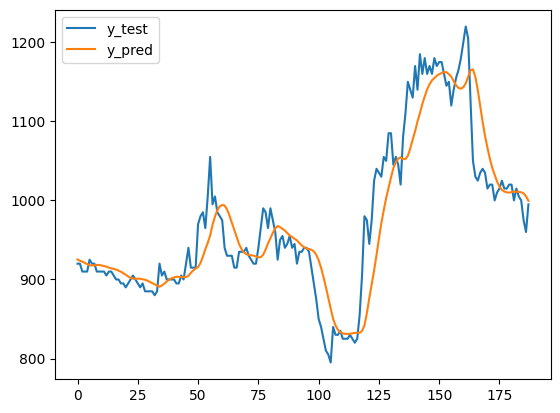

In [5]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()